In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
scenario = "testing"
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=13) 
plt.rc('xtick', labelsize=13) 

In [43]:
scenarios = ["final-EOM", "final-EOM_noDSR", "final-SR1300", "final-SR1500", "final-SR4000", "final-SRy_4"]
# scenarios = ["final-EOM", "final-SR1300",  "final-SRy-4"]
# scenarios = [ "final-SR1300", "final-SR1500", "final-SR4000"]
# scenarios = ['NL-SR3000','NL-SR1600','NL-SR1000' ]
# path_to_results = os.path.join(os.getcwd(), "Scenarios", (scenarioname + ".xlsx"))
# path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "Comparison_"+ scenarioname )

In [44]:
def trapezoidal_rule(x, y):
    area = np.trapz(y, x)
    return area

In [45]:
energy_exchange = {}
conventionals = {}
for i in scenarios:
    print(i)
    df_name = f'{i}'  # Create a unique name for each DataFrame \plots\Scenarios\NL-noSR
    path_to_results1 =os.path.join(os.path.dirname(os.getcwd())  ,"plots" , "Scenarios",  i , "2074.xlsx")
    data =  pd.read_excel(path_to_results1, sheet_name='energy_exchange', index_col=0)

    conventionals[df_name] = pd.DataFrame(data)
    energy_exchange[df_name] = pd.DataFrame(data)

final-EOM
final-EOM_noDSR
final-SR1300
final-SR1500
final-SR4000
final-SRy_4


In [46]:
path_to_results2 =os.path.join(os.path.dirname(os.getcwd())  ,"plots" , "Scenarios",  "futureSRresults" , "EnergyExchange.csv")
data =  pd.read_csv(path_to_results2, sep= ";")
energy_exchange["futureSRresults"] = pd.DataFrame(data)
scenarios.append("futureSRresults")

final-EOM
final-EOM_noDSR
final-SR1300
final-SR1500
final-SR4000
final-SRy_4
futureSRresults


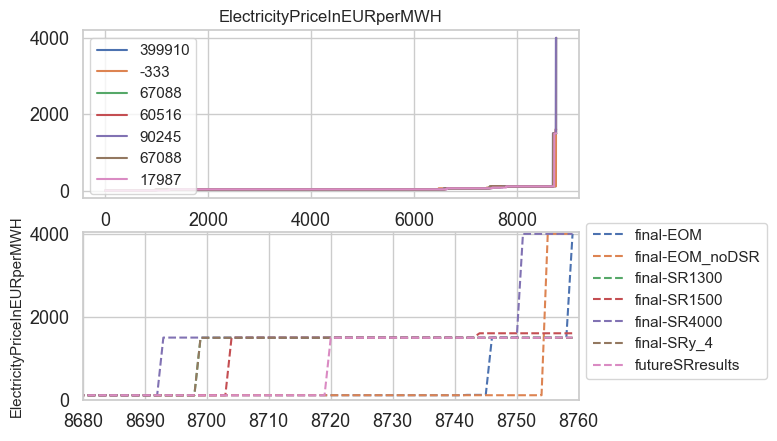

In [49]:
fig, axes= plt.subplots(nrows=2, ncols=1)
names = []
for df_name, df in energy_exchange.items():
    print(df_name)
    names.append(df_name)
    sorted_elec_prices = df["ElectricityPriceInEURperMWH"].copy()    
    sorted_elec_prices.sort_values(ignore_index=True, inplace=True) 
    if df_name == "final-EOM": 
        baseline = trapezoidal_rule(sorted_elec_prices.index, sorted_elec_prices.values)
        area = baseline
    else: 
        area_ = trapezoidal_rule(sorted_elec_prices.index, sorted_elec_prices.values)
        area = area_ -  baseline 
    axs1 = sorted_elec_prices.plot(ax=axes[0], label = int(area) )
    plt.xlim([8680, 8760])
    plt.ylim([0, 4050])
    #plt.legend(names, fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
    axs2 = sorted_elec_prices.plot(ax=axes[1], linestyle="dashed")
axes[1].legend(names, bbox_to_anchor=(1, 1.1))
axes[0].legend( loc='upper left')

plt.ylabel('ElectricityPriceInEURperMWH', fontsize='small')
axes[0].set_title('ElectricityPriceInEURperMWH')
plt.show()

(0.0, 4050.0)

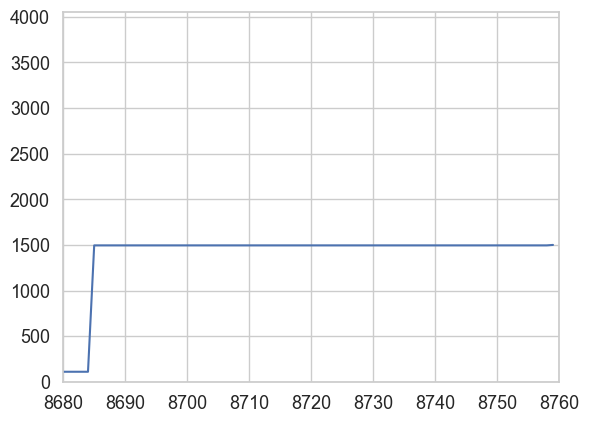

In [10]:
# for i in scenarios:
#     print(i)
#     df_name = f'{i}'  # Create a unique name for each DataFrame \plots\Scenarios\NL-noSR
#     path_to_results1 =os.path.join(os.path.dirname(os.getcwd())  ,"plots" , "Scenarios",  i , "2074.xlsx")
#     data =  pd.read_excel(path_to_results1, sheet_name='energy_exchange', index_col=0)


path_to_results2 =os.path.join(os.path.dirname(os.getcwd())  ,"plots" , "Scenarios",  "futureSRresults" , "EnergyExchange.csv")
data =  pd.read_csv(path_to_results2, sep= ";")
energy_exchange["futureSRresults"] = pd.DataFrame(data)


futureSRresults = energy_exchange["futureSRresults"]
a = futureSRresults["ElectricityPriceInEURperMWH"].sort_values(ignore_index=True)
a.plot()
plt.xlim([8680, 8760])
plt.ylim([0, 4050])